In [63]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import nc_time_axis
import xesmf
import matplotlib.gridspec as gridspec

#from cmip6_preprocessing.preprocessing import full_preprocessing

import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

In [64]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28691 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28691 zstore(s)

	> 59 dcpp_init_year(s)

In [65]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [16]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [91]:
variable='thetao'
freq='Omon'

In [92]:
cat = col.search(experiment_id=['historical'], table_id=freq, variable_id=variable, grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
170,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN
327,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i...,NaN
590,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/BCC/BCC-ESM1/historical/r1i1p1...,NaN
843,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/CAMS/CAMS-CSM1-0/historical/r1...,NaN
906,CMIP,CAS,FGOALS-f3-L,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/CAS/FGOALS-f3-L/historical/r1i...,NaN
1463,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
4484,CMIP,CNRM-CERFACS,CNRM-CM6-1,historical,r10i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-CM6-1/histor...,NaN
5422,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,thetao,gn,gs://cmip6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/histo...,NaN
6043,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/EC-Earth-Consortium/EC-Earth3-...,NaN
6556,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN


In [93]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 23 group(s)


In [94]:
dset_dict.keys()

dict_keys(['CMIP.AWI.AWI-CM-1-1-MR.historical.Omon.gn', 'CMIP.BCC.BCC-CSM2-MR.historical.Omon.gn', 'CMIP.BCC.BCC-ESM1.historical.Omon.gn', 'CMIP.CAMS.CAMS-CSM1-0.historical.Omon.gn', 'CMIP.CAS.FGOALS-f3-L.historical.Omon.gn', 'CMIP.CCCma.CanESM5.historical.Omon.gn', 'CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.Omon.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn', 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Omon.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'CMIP.MIROC.MIROC-ES2L.historical.Omon.gn', 'CMIP.MIROC.MIROC6.historical.Omon.gn', 'CMIP.MOHC.HadGEM3-GC31-LL.historical.Omon.gn', 'CMIP.MOHC.UKESM1-0-LL.historical.Omon.gn', 'CMIP.NASA-GISS.GISS-E2-1-G.historical.Omon.gn', 'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Omon.gn', 'CMIP.NCAR.CESM2.historical.Omon.gn', 'CMIP.NCC.NorCPM1.historical.Omon.gn', 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn', 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn', 'CMIP.NUIST.NESM3.historical.Omon.gn', 'CMIP.SNU.SAM0-UNICON.historical.Omon.

In [95]:
model_grids={'CMIP.AWI.AWI-CM-1-1-MR.historical.Omon.gn': 'ncells',
             'CMIP.BCC.BCC-CSM2-MR.historical.Omon.gn': ['lon','lat'],
             'CMIP.BCC.BCC-ESM1.historical.Omon.gn': ['lon','lat'],
             'CMIP.CAMS.CAMS-CSM1-0.historical.Omon.gn': ['i','j'],
             'CMIP.CCCma.CanESM5.historical.Omon.gn': ['i','j'],
             'CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.Omon.gn': ['x','y'], 
             'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn': ['x','y'],
             'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Omon.gn': ['i','j'],
             'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Omon.gn': ['i','j'],
             'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn': ['x','y'],
             'CMIP.MIROC.MIROC-ES2L.historical.Omon.gn': ['x','y'],
             'CMIP.MIROC.MIROC6.historical.Omon.gn': ['x','y'],
             'CMIP.MOHC.HadGEM3-GC31-LL.historical.Omon.gn': ['i','j'],
             'CMIP.MOHC.UKESM1-0-LL.historical.Omon.gn': ['i','j'],
             'CMIP.MRI.MRI-ESM2-0.historical.Omon.gn': ['x','y'],
             'CMIP.NASA-GISS.GISS-E2-1-G.historical.Omon.gn': ['lon','lat'],
             'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.Omon.gn': ['lon','lat'],
             'CMIP.NASA-GISS.GISS-E2-1-H.historical.Omon.gn': ['lon','lat'],
             'CMIP.NCAR.CESM2.historical.Omon.gn': ['nlon','nlat'],
             'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn': ['x','y'],
             'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gn': ['x','y'],
             'CMIP.NUIST.NESM3.historical.Omon.gn': ['i','j'], 
             'CMIP.SNU.SAM0-UNICON.historical.Omon.gn': ['i','j'],
             'CMIP.UA.MCM-UA-1-0.historical.Omon.gn': ['longitude','latitude']}

In [96]:
# ds=dset_dict['CMIP.NCAR.CESM2.historical.Omon.gn'].isel(member_id=0)
# ds

# get WOA basin mask

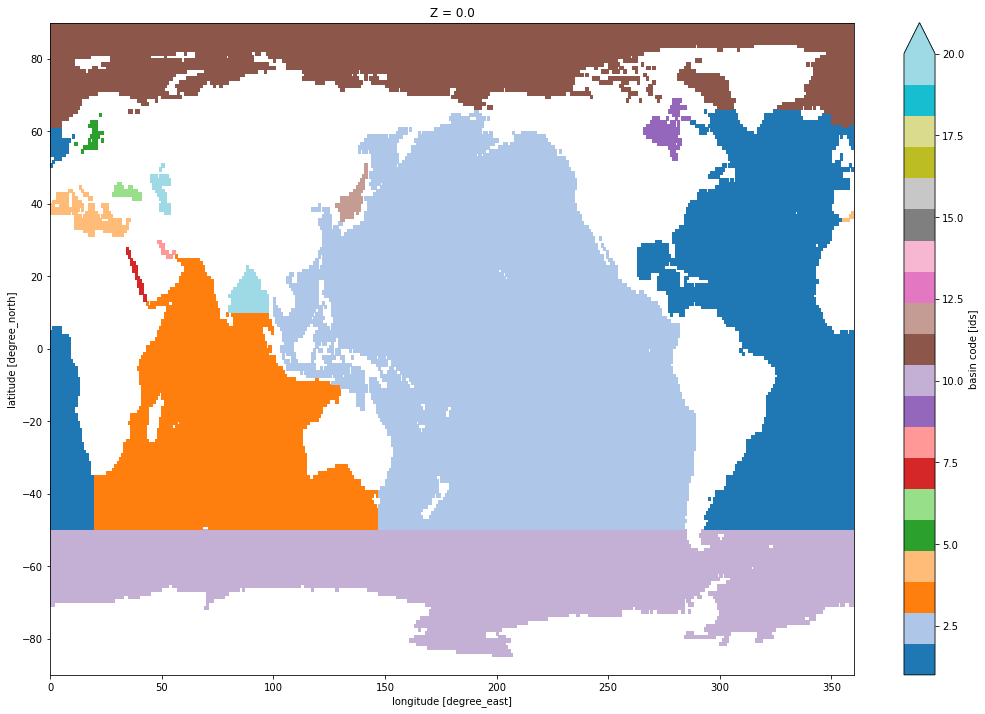

In [97]:
basin = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA05/.Masks/.basin/dods').isel(Z=0).load()
basin.basin.plot(vmax=20, cmap='tab20', figsize=(18, 12))

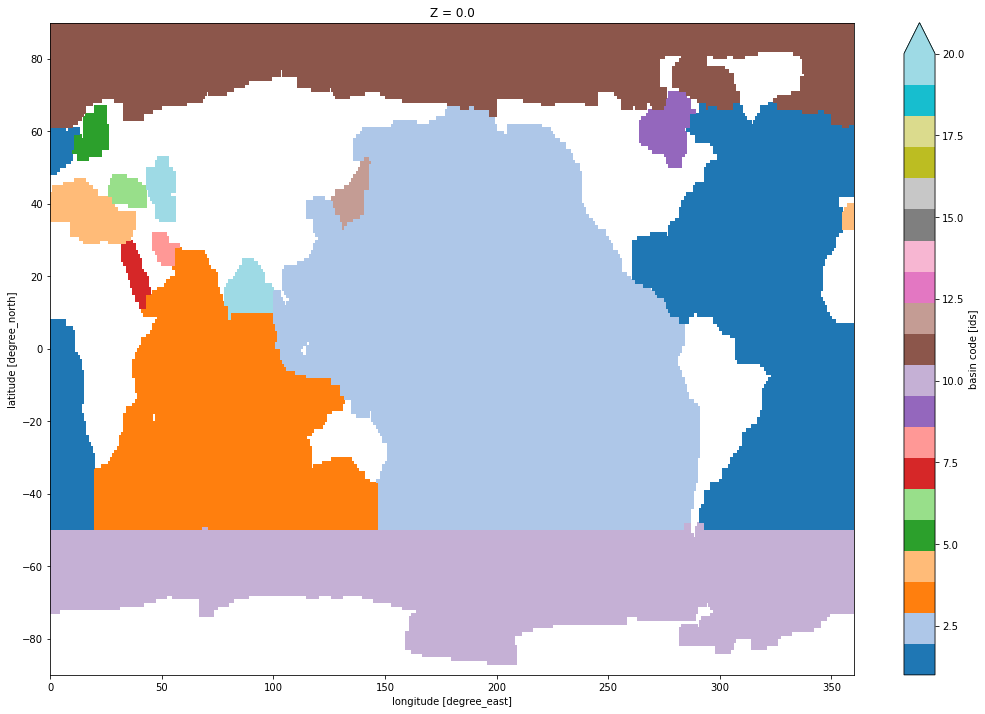

In [98]:
basin_fill = (basin.basin.ffill('Y', 2).bfill('Y', 2)
                         .ffill('X', 2).bfill('X', 2))
basin_fill.plot(vmax=20, cmap='tab20', figsize=(18, 12))

regions={1:'Atlantic Ocean',
         2:'Pacific Ocean',
         3:'Indian Ocean',
         4:'Mediterranean Sea',
         5:'Baltic Sea',
         6:'Black Sea',
         7:'Red Sea',
         8:'Persian Gulf',
         9:'Hudson Bay',
         10:'Southern Ocean',
         11:'Arctic Ocean',
         12:'Sea of Japan'} # many more, see https://data.nodc.noaa.gov/woa/WOA18/DOC/woa18documentation.pdf

In [99]:
choose_basins=[1,2,3,10,11]

In [100]:
for i,b in enumerate(choose_basins):
    print(i,b,regions[b])

0 1 Atlantic Ocean
1 2 Pacific Ocean
2 3 Indian Ocean
3 10 Southern Ocean
4 11 Arctic Ocean


In [101]:
from dask.distributed import Client

client = Client("tcp://10.32.15.120:41841")
client

Client Scheduler: tcp://10.32.15.120:41841 Dashboard: /user/0000-0002-0032-9370/proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 46.00 GB


In [102]:
ds=dset_dict['CMIP.CCCma.CanESM5.historical.Omon.gn']
ds_in = basin.rename({'X': 'lon', 'Y': 'lat'})

# different models require different renaming of data variables in order to perform regridding
ds_out = ds.rename({'longitude':'lon', 'latitude':'lat'})

regridder = xesmf.Regridder(ds_in, ds_out, 'nearest_s2d', reuse_weights=True)

Reuse existing file: nearest_s2d_180x360_291x360.nc


In [103]:
data={}
for m in ['CMIP.NCAR.CESM2.historical.Omon.gn']:#dset_dict.keys():
    data[m]={}
    ds=dset_dict[m]
    regridder = xesmf.Regridder(ds_in, ds, 'nearest_s2d', reuse_weights=True)
    basin_mask = regridder.regrid_dataarray(basin_fill)
    
    for i in range(dset_dict[m].dims['member_id']):
        mem_id=str(dset_dict[m].member_id[i].values)
        data[m][mem_id]={}
        print('processing model',m,'; member', dset_dict[m].member_id[i].values)
        
        for b in choose_basins:
            print('processing basin:', regions[b])
            data[m][mem_id][b]={}
            field=ds[variable].where(basin_mask==b).sel(member_id=mem_id).isel(lev=0).mean(dim=model_grids[m]) #units = mol m-3
            field=field.groupby('time.year').mean('time')
            data[m][mem_id][b] = field.load()

Reuse existing file: nearest_s2d_180x360_384x320.nc
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r10i1p1f1
processing basin: Atlantic Ocean


/srv/conda/envs/notebook/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r11i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r1i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r2i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean


distributed.client - WARNING - Couldn't gather 1 keys, rescheduling {"('stack-a0ad5fa0dfce59f324087c52eb60d898', 6)": ('tcp://10.32.60.19:41809',)}


processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r3i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r4i1p1f1
processing basin: Atlantic Ocean


distributed.client - WARNING - Couldn't gather 20 keys, rescheduling {"('stack-f75f53ec8a3d547b9487402f884ee8e9', 92)": ('tcp://10.32.128.31:33305',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 150)": ('tcp://10.32.128.31:33305',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 16)": ('tcp://10.32.168.24:45331',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 33)": ('tcp://10.32.128.31:33305',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 25)": ('tcp://10.32.128.31:33305',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 80)": ('tcp://10.32.168.24:45331',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 101)": ('tcp://10.32.168.24:45331',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 23)": ('tcp://10.32.168.24:45331',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 114)": ('tcp://10.32.128.31:33305',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 65)": ('tcp://10.32.128.30:37115',), "('stack-f75f53ec8a3d547b9487402f884ee8e9', 89)": ('tcp://10.32.128.31:33305',), "('stack-f75f53ec8a3d547b9487402f884

processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r5i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r6i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r7i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r8i1p1f1
processing basin: Atlantic Ocean


distributed.client - WARNING - Couldn't gather 6 keys, rescheduling {"('stack-8b829cdf5f7853221f5b190397474c1f', 106)": (), "('stack-8b829cdf5f7853221f5b190397474c1f', 16)": (), "('stack-8b829cdf5f7853221f5b190397474c1f', 151)": (), "('stack-8b829cdf5f7853221f5b190397474c1f', 62)": (), "('stack-8b829cdf5f7853221f5b190397474c1f', 132)": (), "('stack-8b829cdf5f7853221f5b190397474c1f', 55)": ()}


processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
processing model CMIP.NCAR.CESM2.historical.Omon.gn ; member r9i1p1f1
processing basin: Atlantic Ocean
processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean


In [48]:
data['CMIP.NCAR.CESM2.historical.Omon.gn']['r10i1p1f1'][1].shape

(165,)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


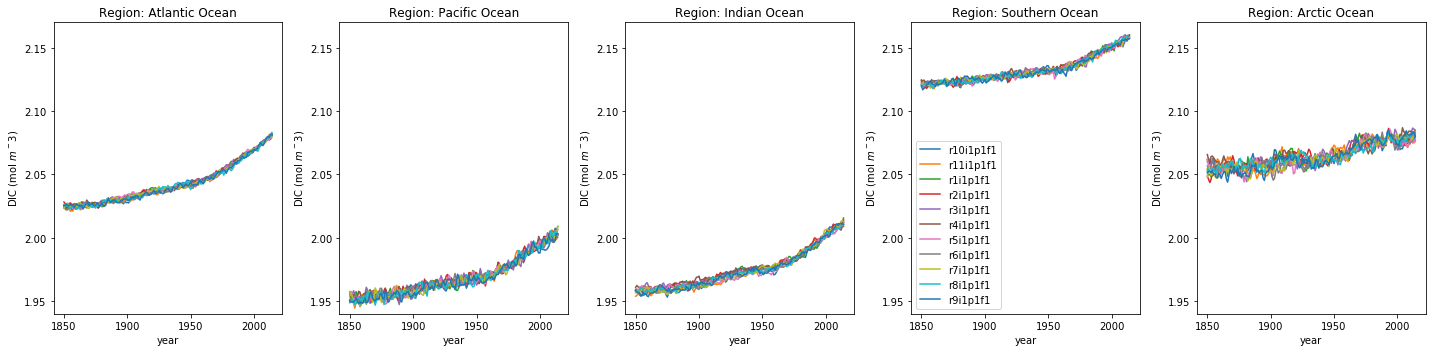

In [55]:
gs = gridspec.GridSpec(1,5)
fig = plt.figure(figsize=(20,5))
ylabel='DIC (mol $m^-3$)'

for m in data.keys():
    for mem_id in data[m].keys():
        for i,b in enumerate(choose_basins): #should be the same basins are in data[m][mem_id]
            f = plt.subplot(gs[0,i])
            basin_name=regions[b]
            field=data[m][mem_id][b]
            field.plot(label=mem_id)
            f.set_ylabel(ylabel)
            f.set_ylim(1.94,2.17)
            plt.title('Region: '+basin_name)
            if i==3:
                plt.legend()

plt.tight_layout()

In [176]:
# for b in choose_basins:
#     field=ds.dissic.isel(lev=slice(None,10)).mean(dim=['nlat','nlon']).sum(dim='lev').values *10 #units = mol m-2
#     field=field[region]
#     field.compute()
#     field.plot()